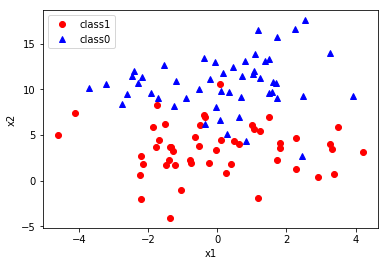

Line2D(class1)


In [1]:

import numpy as np
import matplotlib.pyplot as plt
np.random.seed(1)
%matplotlib inline

# -*- coding: utf-8 -*-
"""
生成test数据集，作为逻辑回归

"""


y1_x1_mu,y1_x1_sigma = 0,2 #均值与标准差
y1_x2_mu,y1_x2_sigma = 3,3.5
y1_x1 = np.random.normal(y1_x1_mu,y1_x1_sigma,50)
y1_x2 = np.random.normal(y1_x2_mu,y1_x2_sigma,50)
y1 = np.ones((50,1))               #第一类label值   设置为1   这样就可以直接用sigmoid生成的概率值来估计类别

y0_x1_mu,y0_x1_sigma = 0,1 #均值与标准差
y0_x2_mu,y0_x2_sigma = 10,3
y0_x1 = np.random.normal(y1_x1_mu,y1_x1_sigma,50)       #符个高斯随机分布的两个坐标值的生成
y0_x2 = np.random.normal(y0_x2_mu,y0_x2_sigma,50)
y0 = np.zeros((50,1))             #第二类label值   设置为0   这样就可以直接用sigmoid生成的概率值来估计类别

x1 = list(y1_x1)
x1.extend(list(y0_x1))

x2 = list(y1_x2)
x2.extend(list(y0_x2))

y = list(y1)
y.extend(list(y0))
#------保存数据 ------
with open("logisticData.txt","w") as f:#使用with不需要f.close()
    for i in range(100):
        write_str = '%f %f %d\n'%(x1[i],x2[i],y[i])
        f.write(write_str)
#------画出散点图  ------       
line1,= plt.plot(x1[:50],x2[:50],'ro',label = 'class1')
line2, = plt.plot(x1[50:],x2[50:],'b^',label ='class0')
plt.xlabel('x1')
plt.ylabel('x2')
plt.legend(handles=[line1,line2],loc = 2)
plt.show()     
print(line1)

In [2]:
#获取数据
def loadDataSet():
    dataMat = [];labelMat = []
    with open('logisticData.txt') as f:
        for line in f.readlines():
            lineList = line.strip().split()
            dataMat.append([float(lineList[0]),float(lineList[1])])
            labelMat.append(int(lineList[2]))
    return dataMat, labelMat

#### 和线性回归不同，logistic Regression 这里的训练数据是一个二维（x，y）坐标对应一个 label值；
具体做法：将假设函数设为h（Theta）= x1*T1 + x2*T2 + bias
因为x_array -> 维度为[1 ,2]  所以 w -> 维度为[2, 1]  这样 x_array * w + b = 维度为[1，1]的label值。
#### 不同点：
1.w x 维度不同

2.loss函数不同

In [3]:
#打印训练数据，观察形式
dataMat, labelMat = loadDataSet()
dataMat = np.array(dataMat)
labelMat = np.array(labelMat)
print(dataMat.shape)
print(labelMat.shape)
print(labelMat)
print(dataMat)


(100, 2)
(100,)
[1 1 1 1 1 1 1 1 1 1 1 1 1 1 1 1 1 1 1 1 1 1 1 1 1 1 1 1 1 1 1 1 1 1 1 1 1
 1 1 1 1 1 1 1 1 1 1 1 1 1 0 0 0 0 0 0 0 0 0 0 0 0 0 0 0 0 0 0 0 0 0 0 0 0
 0 0 0 0 0 0 0 0 0 0 0 0 0 0 0 0 0 0 0 0 0 0 0 0 0 0]
[[ 3.248691  4.050596]
 [-1.223513  1.767126]
 [-1.056344 -0.998814]
 [-2.145937  1.7773  ]
 [ 1.730815  2.26887 ]
 [-4.603077  5.053181]
 [ 3.489624  5.936442]
 [-1.522414  6.258857]
 [ 0.638078  3.999556]
 [-0.498741  6.097994]
 [ 2.924216  0.359607]
 [-4.120281  7.385039]
 [-0.644834  4.795254]
 [-0.768109  1.956675]
 [ 2.267539  4.709814]
 [-2.199783  2.735499]
 [-0.344856  6.960703]
 [-1.755717  8.319359]
 [ 0.084427 10.649514]
 [ 1.16563  -1.887737]
 [-2.201238 -2.054398]
 [ 2.289447  1.234369]
 [ 1.803181  3.56013 ]
 [ 1.004989  6.066591]
 [ 1.801712  4.104722]
 [-1.367456 -4.077704]
 [-0.24578   1.928286]
 [-1.871539  5.897911]
 [-0.535776  3.805332]
 [ 1.060711  5.667039]
 [-1.383322  2.221852]
 [-0.793507  2.297347]
 [-1.374345  3.652965]
 [-1.690411  4.435181

In [9]:
def gen_sample_data():
    #生成初始化 w, b 与初始训练数据
    w = np.zeros((1,2),float)
    b = 1.
    dataMat, labelMat = loadDataSet()
    x_list = np.array(dataMat)
    y_list = np.array(labelMat)
    return x_list, y_list, w, b

In [17]:
#训练函数
def train(x_list, gt_y_list, w, b, batch_size, lr, max_iter):
    num_sample = len(x_list)
    for i in range(max_iter):
        #采用 mini-batch方法，从数据中抽出batch_size大小的数据作为训练
        batch_indx = np.random.choice(len(x_list), batch_size)
        batch_x = [x_list[j] for j in batch_indx]
        batch_y = [gt_y_list[j] for j in batch_indx]
        w, b = cal_step_gradient(batch_x, batch_y, w, b, lr)
        if i % 100 == 0:    #每10个输出一个更新值
            print('w:{0}, b:{1}'.format(w, b))
            print('loss is {0}'.format(eval_loss(w, b, x_list, gt_y_list)))

In [18]:
#x .shape = (100,2)     y.shape = (100,1)
#每次取一组数据   （1，2） *（2，1） + （1，1） = （1.1）
def sigmoid(z):
    return 1 / (1 + np.exp(-z))

def eval_loss(w, b, x_list, gt_y_list):
    avg_loss = 0.0
    for i in range(len(x_list)):
        A = sigmoid(np.dot(x_list[i], w.T) + b)
        avg_loss += -(gt_y_list[i] * np.log(A) + (1 - gt_y_list[i]) * (np.log(1 - A)))
    avg_loss /= len(gt_y_list)
    return avg_loss

def gradient(pred_y, gt_y, x) :
    #逻辑回归和线性回归公式一样
    #print (pred_y, gt_y, x)
    diff = pred_y - gt_y
    dw = diff * x
    db = diff
    #print(db)
    return dw, db

In [19]:
def cal_step_gradient(batch_x_list, batch_gt_y_list, w, b, lr):
    avg_dw = np.array([0.,0.])
    avg_db = 0.
    batch_size = len(batch_x_list)
    for i in range(batch_size):
        pred_y = sigmoid(np.dot(batch_x_list[i] , w.T) + b)
        dw, db = gradient(pred_y, batch_gt_y_list[i], batch_x_list[i])
        avg_dw += dw
        avg_db += db
    avg_dw /= batch_size
    avg_db /= batch_size
    w -= lr * avg_dw
    b -= lr * avg_db
    return w, b

In [20]:
def run():
    x_list, y_list, w, b = gen_sample_data()
    lr = 0.001
    max_iter = 100000
    train(x_list, y_list, w, b, 80, lr, max_iter)

if __name__ == '__main__':	# 跑.py的时候，跑main下面的；被导入当模块时，main下面不跑，其他当函数调
    run()


w:[[-0.0001946  -0.00479058]], b:[0.99965644]
loss is [0.79692499]
w:[[-0.00466119 -0.17113413]], b:[0.99405941]
loss is [0.46474157]
w:[[-0.00889523 -0.21097326]], b:[1.00121807]
loss is [0.4481117]
w:[[-0.00945624 -0.22216675]], b:[1.01181388]
loss is [0.44572333]
w:[[-0.01207489 -0.22766368]], b:[1.02310671]
loss is [0.44417603]
w:[[-0.01489254 -0.22990495]], b:[1.03480917]
loss is [0.44272961]
w:[[-0.01706082 -0.22716366]], b:[1.04700597]
loss is [0.44136741]
w:[[-0.01919454 -0.23273539]], b:[1.05784514]
loss is [0.43995523]
w:[[-0.02098509 -0.23025489]], b:[1.06977338]
loss is [0.43863153]
w:[[-0.02197386 -0.23434334]], b:[1.08087185]
loss is [0.43725461]
w:[[-0.02382499 -0.23492171]], b:[1.09242355]
loss is [0.43591543]
w:[[-0.02469217 -0.2355138 ]], b:[1.10383182]
loss is [0.43461947]
w:[[-0.02541177 -0.2357066 ]], b:[1.11506014]
loss is [0.43337351]
w:[[-0.02769874 -0.23667915]], b:[1.12618696]
loss is [0.43210244]
w:[[-0.02906825 -0.24038019]], b:[1.13695965]
loss is [0.430798

w:[[-0.0613582  -0.35502142]], b:[2.08191229]
loss is [0.34596755]
w:[[-0.06116274 -0.35346606]], b:[2.08922785]
loss is [0.34549758]
w:[[-0.06195072 -0.3559495 ]], b:[2.0956381]
loss is [0.34502168]
w:[[-0.06250523 -0.35552012]], b:[2.10243935]
loss is [0.34457425]
w:[[-0.06429849 -0.3595066 ]], b:[2.10860859]
loss is [0.34412245]
w:[[-0.06564735 -0.35917482]], b:[2.11546861]
loss is [0.34365538]
w:[[-0.0648702  -0.35995027]], b:[2.12233834]
loss is [0.3431847]
w:[[-0.06509822 -0.3611323 ]], b:[2.12893682]
loss is [0.3427341]
w:[[-0.06520098 -0.36337068]], b:[2.13541048]
loss is [0.34229917]
w:[[-0.06486364 -0.36390561]], b:[2.1420076]
loss is [0.34185056]
w:[[-0.06209706 -0.36532041]], b:[2.14898592]
loss is [0.34138455]
w:[[-0.06237944 -0.36733237]], b:[2.15543165]
loss is [0.34097213]
w:[[-0.06314929 -0.36746571]], b:[2.16195463]
loss is [0.34052335]
w:[[-0.06334738 -0.36690631]], b:[2.16847696]
loss is [0.34007473]
w:[[-0.06345197 -0.36896416]], b:[2.17488293]
loss is [0.33966208]

w:[[-0.07729697 -0.44427401]], b:[2.78115119]
loss is [0.30547745]
w:[[-0.07772081 -0.44344274]], b:[2.78577735]
loss is [0.30524693]
w:[[-0.07802758 -0.44500874]], b:[2.79024333]
loss is [0.3050427]
w:[[-0.07798787 -0.44123071]], b:[2.79571598]
loss is [0.30481209]
w:[[-0.07821359 -0.43945644]], b:[2.80069565]
loss is [0.30465286]
w:[[-0.07774045 -0.44437089]], b:[2.80489007]
loss is [0.30435341]
w:[[-0.07773942 -0.44505856]], b:[2.80940146]
loss is [0.30414229]
w:[[-0.07794112 -0.44845717]], b:[2.81359921]
loss is [0.30395731]
w:[[-0.07740704 -0.44875554]], b:[2.81819824]
loss is [0.30374148]
w:[[-0.07820991 -0.44802407]], b:[2.82270768]
loss is [0.30352211]
w:[[-0.07810875 -0.44920527]], b:[2.82729007]
loss is [0.30331383]
w:[[-0.07841086 -0.44820907]], b:[2.83207114]
loss is [0.30309147]
w:[[-0.07858478 -0.44817842]], b:[2.83664655]
loss is [0.30288537]
w:[[-0.07715886 -0.44570576]], b:[2.84169809]
loss is [0.30271819]
w:[[-0.07712253 -0.44588727]], b:[2.84626926]
loss is [0.302522

loss is [0.28529612]
w:[[-0.08982671 -0.50345795]], b:[3.27511904]
loss is [0.28516977]
w:[[-0.08991147 -0.50379065]], b:[3.2785747]
loss is [0.28504888]
w:[[-0.08918846 -0.50478948]], b:[3.281976]
loss is [0.28492702]
w:[[-0.09004636 -0.50357961]], b:[3.28560746]
loss is [0.28481639]
w:[[-0.09033258 -0.50550029]], b:[3.28882414]
loss is [0.2846851]
w:[[-0.09046273 -0.5011443 ]], b:[3.29286456]
loss is [0.28465615]
w:[[-0.08986005 -0.50399675]], b:[3.29596546]
loss is [0.28447305]
w:[[-0.08991176 -0.50895397]], b:[3.29884786]
loss is [0.28433768]
w:[[-0.09017717 -0.50977113]], b:[3.30230462]
loss is [0.28422021]
w:[[-0.0904083  -0.51023191]], b:[3.30557915]
loss is [0.2841066]
w:[[-0.09008094 -0.51134037]], b:[3.30887329]
loss is [0.28400243]
w:[[-0.0910592  -0.51006586]], b:[3.31241421]
loss is [0.28386193]
w:[[-0.09095155 -0.51047327]], b:[3.31585456]
loss is [0.28374381]
w:[[-0.09044171 -0.51191306]], b:[3.31923186]
loss is [0.283636]
w:[[-0.09069947 -0.51120377]], b:[3.32272806]
lo

w:[[-0.10832313 -0.55723061]], b:[3.65807375]
loss is [0.2731596]
w:[[-0.10867859 -0.55714139]], b:[3.66072144]
loss is [0.2730779]
w:[[-0.10892294 -0.55575614]], b:[3.66348334]
loss is [0.27298012]
w:[[-0.10874843 -0.5535099 ]], b:[3.66641882]
loss is [0.27290172]
w:[[-0.10918933 -0.55360812]], b:[3.66918522]
loss is [0.27282795]
w:[[-0.10873498 -0.55605955]], b:[3.6716508]
loss is [0.27275192]
w:[[-0.10950888 -0.55461551]], b:[3.67439215]
loss is [0.27268168]
w:[[-0.10910167 -0.55509697]], b:[3.67719185]
loss is [0.27260412]
w:[[-0.10968073 -0.55815495]], b:[3.67947933]
loss is [0.27254328]
w:[[-0.11004342 -0.55680148]], b:[3.68230581]
loss is [0.27245943]
w:[[-0.10866036 -0.55325702]], b:[3.68565597]
loss is [0.27242158]
w:[[-0.1079218  -0.55366222]], b:[3.68825364]
loss is [0.27234941]
w:[[-0.10741646 -0.55780516]], b:[3.69052826]
loss is [0.2722383]
w:[[-0.10824241 -0.55849783]], b:[3.69303077]
loss is [0.27216943]
w:[[-0.10794299 -0.55955636]], b:[3.69554649]
loss is [0.27210421]

loss is [0.26553072]
w:[[-0.122894   -0.59583663]], b:[3.9632539]
loss is [0.26549476]
w:[[-0.12354411 -0.59511725]], b:[3.96553015]
loss is [0.26543184]
w:[[-0.12351688 -0.5950995 ]], b:[3.96773764]
loss is [0.26537979]
w:[[-0.12358983 -0.59359631]], b:[3.97021182]
loss is [0.26532101]
w:[[-0.1235381  -0.59325533]], b:[3.97261951]
loss is [0.26527041]
w:[[-0.1238611  -0.59443271]], b:[3.97461925]
loss is [0.26522168]
w:[[-0.12316047 -0.59300902]], b:[3.97709007]
loss is [0.26517787]
w:[[-0.12226698 -0.59198351]], b:[3.97963928]
loss is [0.26514156]
w:[[-0.1214816  -0.59271844]], b:[3.98184236]
loss is [0.26508407]
w:[[-0.12193146 -0.59302321]], b:[3.98408429]
loss is [0.26503406]
w:[[-0.12245754 -0.59453725]], b:[3.98590434]
loss is [0.26497715]
w:[[-0.12236961 -0.59422175]], b:[3.98821472]
loss is [0.26493273]
w:[[-0.12191393 -0.59844239]], b:[3.9899253]
loss is [0.26488958]
w:[[-0.12234727 -0.59780374]], b:[3.99222617]
loss is [0.26483164]
w:[[-0.12335481 -0.59955153]], b:[3.9940766

w:[[-0.12966821 -0.62430827]], b:[4.21384429]
loss is [0.2603137]
w:[[-0.1295078  -0.62545181]], b:[4.21552398]
loss is [0.26027804]
w:[[-0.13007671 -0.62656687]], b:[4.21714737]
loss is [0.26024747]
w:[[-0.12999581 -0.62523869]], b:[4.21935582]
loss is [0.2602089]
w:[[-0.12905873 -0.62599462]], b:[4.22126784]
loss is [0.26017174]
w:[[-0.12857055 -0.62605207]], b:[4.22326621]
loss is [0.26013586]
w:[[-0.12912483 -0.6280801 ]], b:[4.22476038]
loss is [0.26010896]
w:[[-0.12913104 -0.6296762 ]], b:[4.22625152]
loss is [0.2600948]
w:[[-0.12939352 -0.62634431]], b:[4.22860467]
loss is [0.2600379]
w:[[-0.1288684  -0.62324629]], b:[4.23107375]
loss is [0.26004636]
w:[[-0.12916847 -0.62547911]], b:[4.2326156]
loss is [0.25997793]
w:[[-0.1286166  -0.62649484]], b:[4.23435279]
loss is [0.25993723]
w:[[-0.12910972 -0.62919158]], b:[4.23577898]
loss is [0.25990366]
w:[[-0.12904249 -0.62923422]], b:[4.23762041]
loss is [0.25986917]
w:[[-0.12881945 -0.63072281]], b:[4.23930756]
loss is [0.25984696]


loss is [0.25665319]
w:[[-0.13923872 -0.65339268]], b:[4.42677268]
loss is [0.25661985]
w:[[-0.13831806 -0.65339395]], b:[4.42856159]
loss is [0.25659229]
w:[[-0.13834294 -0.65631263]], b:[4.42987333]
loss is [0.25658936]
w:[[-0.13873432 -0.65617865]], b:[4.43145196]
loss is [0.25655953]
w:[[-0.13890745 -0.65597715]], b:[4.43317879]
loss is [0.25652748]
w:[[-0.13917891 -0.65503564]], b:[4.43490696]
loss is [0.2564923]
w:[[-0.13864588 -0.65542218]], b:[4.4364327]
loss is [0.25646959]
w:[[-0.13892393 -0.65659686]], b:[4.43797547]
loss is [0.25645188]
w:[[-0.13922447 -0.65476552]], b:[4.43976837]
loss is [0.25641475]
w:[[-0.13922913 -0.65410636]], b:[4.44148404]
loss is [0.25639094]
w:[[-0.13998074 -0.65423615]], b:[4.443025]
loss is [0.25636677]
w:[[-0.13909647 -0.65566221]], b:[4.44463141]
loss is [0.25633851]
w:[[-0.13920732 -0.65656073]], b:[4.4461316]
loss is [0.25631639]
w:[[-0.1397522 -0.6567098]], b:[4.44766406]
loss is [0.25629172]
w:[[-0.13978532 -0.65271807]], b:[4.44966615]
lo

w:[[-0.14676176 -0.6741574 ]], b:[4.60541763]
loss is [0.25399308]
w:[[-0.14652374 -0.67278528]], b:[4.60690669]
loss is [0.25399878]
w:[[-0.14694186 -0.67285435]], b:[4.60824427]
loss is [0.25398266]
w:[[-0.1466429  -0.67415487]], b:[4.60946641]
loss is [0.2539452]
w:[[-0.1471134  -0.67396258]], b:[4.61079833]
loss is [0.25393287]
w:[[-0.14680955 -0.67485418]], b:[4.61216784]
loss is [0.25390335]
w:[[-0.14657329 -0.6792422 ]], b:[4.61297611]
loss is [0.2538817]
w:[[-0.14661457 -0.67663202]], b:[4.61471243]
loss is [0.25385479]
w:[[-0.1464464  -0.67738994]], b:[4.61618237]
loss is [0.25383243]


In [21]:
a = sigmoid(0.9842)
a

0.727940792764363

In [56]:
#验证使用训练得到的w,b对输入变量进行预测，观察预测值
w =np.array([[-0.23444826 ,-0.8833151 ]])
b = 6.15
dataMat, labelMat = loadDataSet()
x_list = np.array(dataMat)
y_list = np.array(labelMat)
#print(x_list[1])
#print(w.T)
print("预测,实际")
for i in range(100):
    e = sigmoid(np.dot(x_list[i], w.T) + b)
    print (np.round(e), y_list[i])

预测,实际
[1.] 1
[1.] 1
[1.] 1
[1.] 1
[1.] 1
[0.] 1
[0.] 1
[0.] 1
[1.] 1
[0.] 1
[1.] 1
[0.] 1
[0.] 1
[1.] 1
[0.] 1
[1.] 1
[0.] 1
[0.] 1
[0.] 1
[1.] 1
[1.] 1
[1.] 1
[1.] 1
[0.] 1
[1.] 1
[1.] 1
[1.] 1
[0.] 1
[1.] 1
[0.] 1
[1.] 1
[1.] 1
[1.] 1
[1.] 1
[1.] 1
[1.] 1
[1.] 1
[1.] 1
[1.] 1
[0.] 1
[0.] 1
[1.] 1
[1.] 1
[1.] 1
[1.] 1
[1.] 1
[1.] 1
[1.] 1
[1.] 1
[0.] 1
[0.] 0
[1.] 0
[0.] 0
[0.] 0
[0.] 0
[0.] 0
[0.] 0
[0.] 0
[0.] 0
[0.] 0
[0.] 0
[0.] 0
[0.] 0
[0.] 0
[0.] 0
[0.] 0
[0.] 0
[0.] 0
[0.] 0
[1.] 0
[0.] 0
[0.] 0
[0.] 0
[0.] 0
[0.] 0
[0.] 0
[0.] 0
[0.] 0
[0.] 0
[0.] 0
[0.] 0
[0.] 0
[0.] 0
[0.] 0
[0.] 0
[0.] 0
[0.] 0
[0.] 0
[0.] 0
[0.] 0
[0.] 0
[0.] 0
[0.] 0
[0.] 0
[0.] 0
[0.] 0
[0.] 0
[0.] 0
[0.] 0
[0.] 0
